# STAT 4010/5010 Unit #6 Code: GLMs


## Problem #1
In January 1986, the space shuttle Challenger exploded shortly after launch. An investigation was launched into the cause of the crash and attention focused on the rubber O-ring seals in the rocket boosters. At lower temperatures, rubber becomes more brittle and is a less effective sealant. At the time of the launch, the temperature was 31°F. Could the failure of the O-rings have been predicted? In the 23 previous shuttle missions for which data exists, some evidence of damage due to blow by and erosion was recorded on some O-rings. Each shuttle had two boosters, each with three O-rings. For each mission, we know the number of O-rings out of six showing some damage and the launch temperature. 

The 'orings' is a data frame with 23 observations on the following 2 variables.

1. temp:  Ambient temperature (Fahrenheit) at launch time
2. damage: Number of damaged 'O' rings (out of a total of 6)

#### (a) Construct a new variable called prop, which is the proportion of damaged 'O' rings. Plot prop against temperature. What do you notice about this plot?

In [12]:
rm(list = ls())
library(faraway)
library(MASS)
#library(aod) #wald.test
#library(lmtest) #lrtest (likelihood ratio test--same as anova)

data(orings)
head(orings)

temp,damage
53,5
57,1
58,1
63,1
66,0
67,0


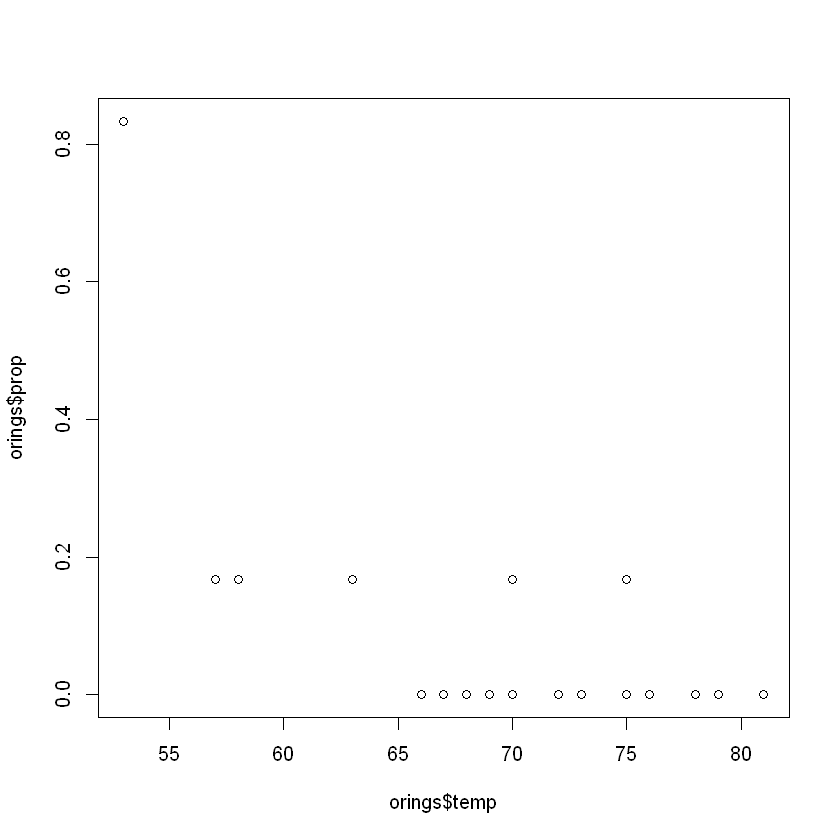

In [13]:
orings$prop = orings$damage / 6
plot(orings$temp, orings$prop)

There appears to be some correlation between temperature and the number of orings that failed. For the most part, the colder it was, the more that failed and more than 1 oring failed only at the coldest temperatures.

#### (b) Let's use the 'glm' function for fitting the logit model (logistic regression). The first argument will be the model: RESPONSE ~ PREDICTORS. For binomial response data, we need two pieces of information about the response values—y and n. Thus for binomial families, the response can be specified as a two-column matrix with the columns giving the numbers of successes and failures. You'll also need to specify the family argument, and the data argument. Other arguments should include 'data' and 'family'. Use ?glm to specify these arguments.


In [74]:
glmod = glm(cbind(orings$damage, 6-orings$damage) ~ temp, data = orings, family = binomial)
summary(glmod)

# Long way to calculate pearson residuals with equation
phat = predict(glmod, type = "response");
r = with(orings, (damage/6 - phat) / sqrt((phat*(1-phat))/6)) # Formula for Pearson Residuals
summary(r)
# Shorter way to calculate pearson residuals
summary(resid(glmod, type = "pearson"))
# If you want deviance residuals
summary(resid(glmod, type = "deviance"))


Call:
glm(formula = cbind(orings$damage, 6 - orings$damage) ~ temp, 
    family = binomial, data = orings)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9529  -0.7345  -0.4393  -0.2079   1.9565  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 11.66299    3.29626   3.538 0.000403 ***
temp        -0.21623    0.05318  -4.066 4.78e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 38.898  on 22  degrees of freedom
Residual deviance: 16.912  on 21  degrees of freedom
AIC: 33.675

Number of Fisher Scoring iterations: 6


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.89727 -0.56606 -0.31188  0.07184 -0.14717  3.77106 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.89727 -0.56606 -0.31188  0.07184 -0.14717  3.77106 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.9529 -0.7345 -0.4393 -0.1661 -0.2079  1.9565 

#### (c) Plot the data again with the logit model. You can do this easily with the ilogit function.

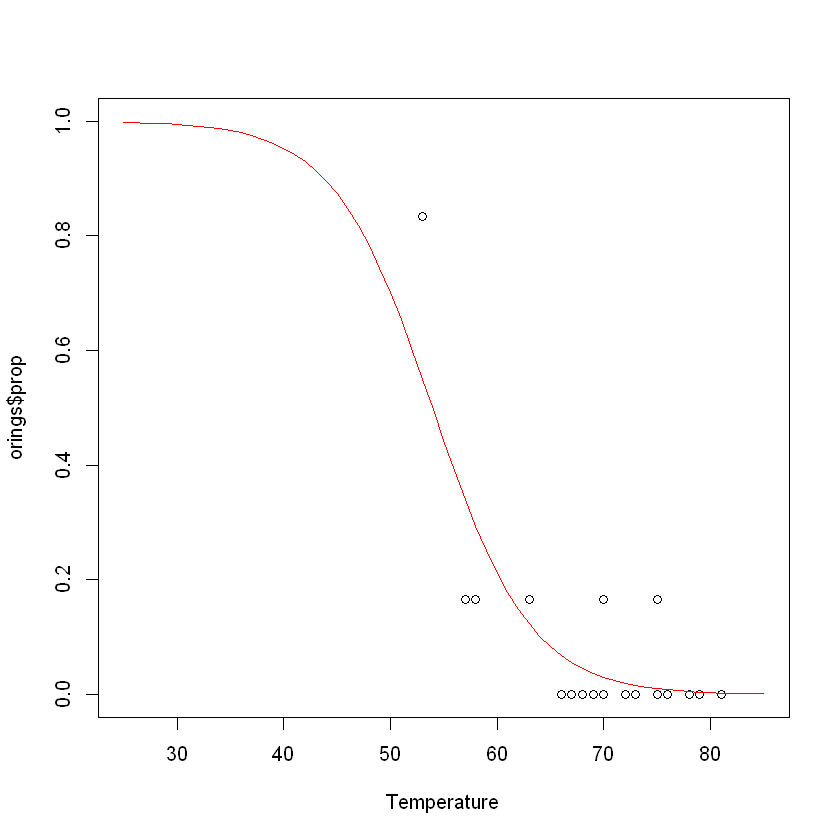

In [75]:
plot(orings$temp, orings$prop, xlim = c(25,85), ylim = c(0,1), xlab = "Temperature")
x = seq(25, 85, 1)
# Numbers in ilogit come from estimates above
lines(x, ilogit(11.66299 - 0.21623*x), col = "red") #ilogit is the inverse

#### (d) Now let's check the interpretation of $\widehat{\beta}_1$. Create a new temperature value of 45 and 46 degrees. Calculuate the odds of failure at 45 and 46 degrees. What is the ratio of these two odds? 

In [76]:
head(orings)

temp,damage,prop,fit,se_fit,fit_resp,upper,lower
53,5,0.8333333,0.2026055,0.5823128,0.55047882,0.7969324,0.27647394
57,1,0.1666667,-0.6623292,0.4351906,0.34021659,0.5518262,0.17759748
58,1,0.1666667,-0.8785628,0.4075604,0.29347569,0.4841448,0.15529201
63,1,0.1666667,-1.9597311,0.3667597,0.12349615,0.2268452,0.06337280
66,0,0.0000000,-2.6084321,0.4282805,0.06859771,0.1478113,0.03032487
67,0,0.0000000,-2.8246658,0.4593900,0.05600575,0.1294438,0.02312497


In [77]:
newdata = data.frame(temp = c(45, 46))
pred = predict(glmod, newdata, type = "response")
pred
newdata$odds = pred / (1 - pred)
newdata

1         2 
0.8735231 0.8476440

temp,odds
45,6.906582
46,5.563576


In [78]:
newdata[1, ]$odds / newdata[2, ]$odds

[1] 1.241392

The odds of it failing are 6.91 at 45 degrees and 5.56 at 46 degrees. The ratio is then 1.24 between these two odds.

#### (e) Compute confidence intervals for the model parameters "by hand".

In [73]:
# Get the model parameters
params = summary(glmod)$coef

lower1 = exp(params[1, 1] - 1.96*params[1, 2])
upper1 = exp(params[1, 1] + 1.96*params[1, 2])

lower2 = exp(params[2, 1] - 1.96*params[2, 2])
upper2 = exp(params[2, 1] + 1.96*params[2, 2])

lower1; upper1; lower2; upper2;

[1] 181.6922

[1] 74303266

[1] 0.7258146

[1] 0.8940383

The 95% confidence interval for the intercept is [181.69, 74303266.05] and the 95% confidence interval for temp is [0.72, 0.89].

#### (f) Now compute them using confint(glmod). Notice that these intervals are slightly different; they are based on the profile likelihood and do not assume asymptotic normality. They are more accurate for small sample sizes. Profile likelihood confidence intervals don’t assume normality of the estimator and appear to perform better for small samples sizes than Wald CIs (above). They are, nonetheless, still based on an asymptotic approximation – the asymptotic chi-square distribution of the log likelihood ratio test statistic. (for more info: http://www.math.umt.edu/patterson/ProfileLikelihoodCI.pdf)

In [55]:
exp(confint(glmod))

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),263.8010254,1.372889e+08
temp,0.7170161,8.867617e-01


#### (g) Predict the probability of faulire at Temp = 45 degrees.


From the predictions eariler in part (d), we can see that the probability of failure at 45 degrees is 0.874.

## Problem #2 

A researcher is interested in how variables, such as gre (Graduate Record Exam scores), gpa (grade point average) and prestige of the undergraduate institution (rank), effect admission into graduate school. The response variable, admit/don't admit, is a binary variable.



In [79]:
admission = read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

admission$rank = as.factor(admission$rank)
head(admission)


admit,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
1,800,4.00,1
1,640,3.19,4
0,520,2.93,4
1,760,3.00,2


#### (a) Perform logistic regression treating ${\tt admit}$ as the response. Be sure to treat ${\tt rank}$ as a categorical variable.

In [80]:
glmod = glm(admit ~ ., data = admission, family = binomial)
summary(glmod)


Call:
glm(formula = admit ~ ., family = binomial, data = admission)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6268  -0.8662  -0.6388   1.1490   2.0790  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.989979   1.139951  -3.500 0.000465 ***
gre          0.002264   0.001094   2.070 0.038465 *  
gpa          0.804038   0.331819   2.423 0.015388 *  
rank2       -0.675443   0.316490  -2.134 0.032829 *  
rank3       -1.340204   0.345306  -3.881 0.000104 ***
rank4       -1.551464   0.417832  -3.713 0.000205 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.52  on 394  degrees of freedom
AIC: 470.52

Number of Fisher Scoring iterations: 4


#### (b) Construct a reduced model without the ${\tt rank}$ variable. Conduct the likelihood ratio test to decide whether the reduced model is sufficient. You can do this using ${\tt anova}$ or ${\tt lrtest}$.

In [81]:
glmodRed = glm(admit ~ gre + gpa, data = admission, family = binomial)
summary(glmodRed)


Call:
glm(formula = admit ~ gre + gpa, family = binomial, data = admission)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2730  -0.8988  -0.7206   1.3013   2.0620  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.949378   1.075093  -4.604 4.15e-06 ***
gre          0.002691   0.001057   2.544   0.0109 *  
gpa          0.754687   0.319586   2.361   0.0182 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 480.34  on 397  degrees of freedom
AIC: 486.34

Number of Fisher Scoring iterations: 4


In [84]:
anova(glmodRed, glmod, test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
397,480.3440,NA,NA,NA
394,458.5175,3,21.82649,7.088456e-05


From the anova test, we can see that the p-value is less than 0.05. Therefor we reject the null and assert that there is a difference between the models so the reduced model is not sufficient. We should use the full model with the rank predictor to best model the data.

## Problem #3

For each 30 Galapagos islands, we have a count of the number of plant species found on each island and the number that are endemic to that island. We also have five geographic variables for each island. 

1. Species: the number of plant species found on the island
2. Endemics: the number of endemic species
3. Area: the area of the island (km$^2$)
4. Elevation: the highest elevation of the island (m)
5. Nearest: the distance from the nearest island (km)
6. Scruz: the distance from Santa Cruz island (km)
7. Adjacent: the area of the adjacent island (square km)

#### (a) Remove the Endemics variable from the dataframe, and fit a linear model with Species as the respons and all other variables as predictors. Run some diagnostics and explain why this model is not the best fit.

,Species,Endemics,Area,Elevation,Nearest,Scruz,Adjacent
Baltra,58,23,25.09,346,0.6,0.6,1.84
Bartolome,31,21,1.24,109,0.6,26.3,572.33
Caldwell,3,3,0.21,114,2.8,58.7,0.78
Champion,25,9,0.10,46,1.9,47.4,0.18
Coamano,2,1,0.05,77,1.9,1.9,903.82
Daphne.Major,18,11,0.34,119,8.0,8.0,1.84



Call:
lm(formula = Species ~ ., data = gala)

Residuals:
     Min       1Q   Median       3Q      Max 
-111.679  -34.898   -7.862   33.460  182.584 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.068221  19.154198   0.369 0.715351    
Area        -0.023938   0.022422  -1.068 0.296318    
Elevation    0.319465   0.053663   5.953 3.82e-06 ***
Nearest      0.009144   1.054136   0.009 0.993151    
Scruz       -0.240524   0.215402  -1.117 0.275208    
Adjacent    -0.074805   0.017700  -4.226 0.000297 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60.98 on 24 degrees of freedom
Multiple R-squared:  0.7658,	Adjusted R-squared:  0.7171 
F-statistic:  15.7 on 5 and 24 DF,  p-value: 6.838e-07


Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

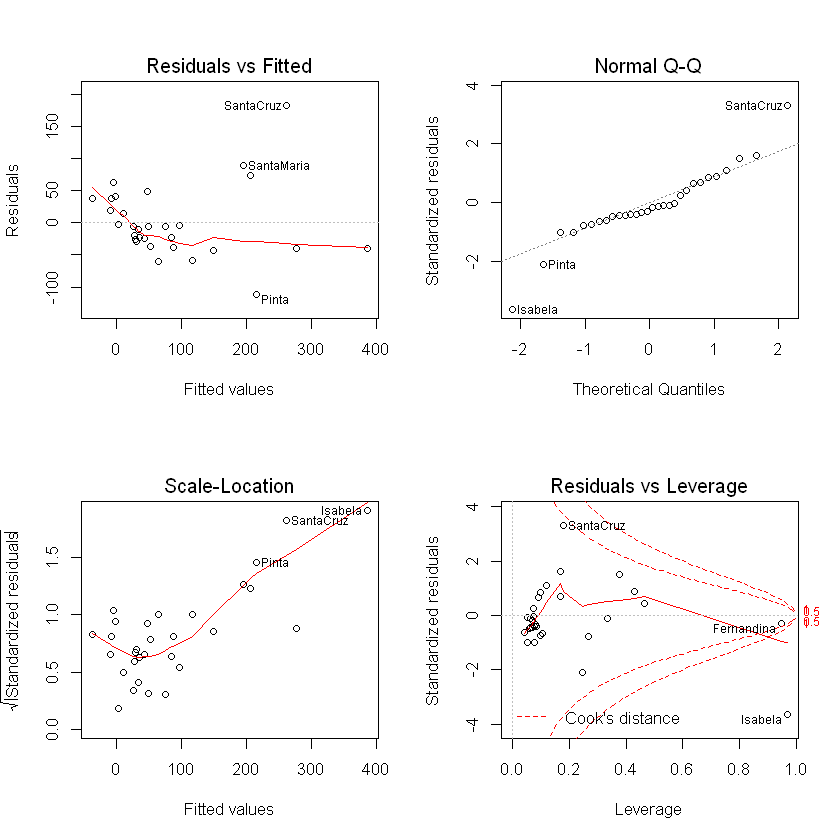

In [13]:
library(faraway)
data(gala)
head(gala)

gala = gala[ , !(names(gala) %in% "Endemics")]

lmod = lm(Species ~ ., data = gala)
summary(lmod)
par(mfrow = c(2,2)); plot(lmod)

#### (b) Recall that a square root transformation of the response might be helpful when the nonconstant variance assumption is violated. Try this transformation. 


Call:
lm(formula = sqrt(Species) ~ ., data = gala)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5572 -1.4969 -0.3031  1.3527  5.2110 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.3919243  0.8712678   3.893 0.000690 ***
Area        -0.0019718  0.0010199  -1.933 0.065080 .  
Elevation    0.0164784  0.0024410   6.751 5.55e-07 ***
Nearest      0.0249326  0.0479495   0.520 0.607844    
Scruz       -0.0134826  0.0097980  -1.376 0.181509    
Adjacent    -0.0033669  0.0008051  -4.182 0.000333 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.774 on 24 degrees of freedom
Multiple R-squared:  0.7827,	Adjusted R-squared:  0.7374 
F-statistic: 17.29 on 5 and 24 DF,  p-value: 2.874e-07


Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

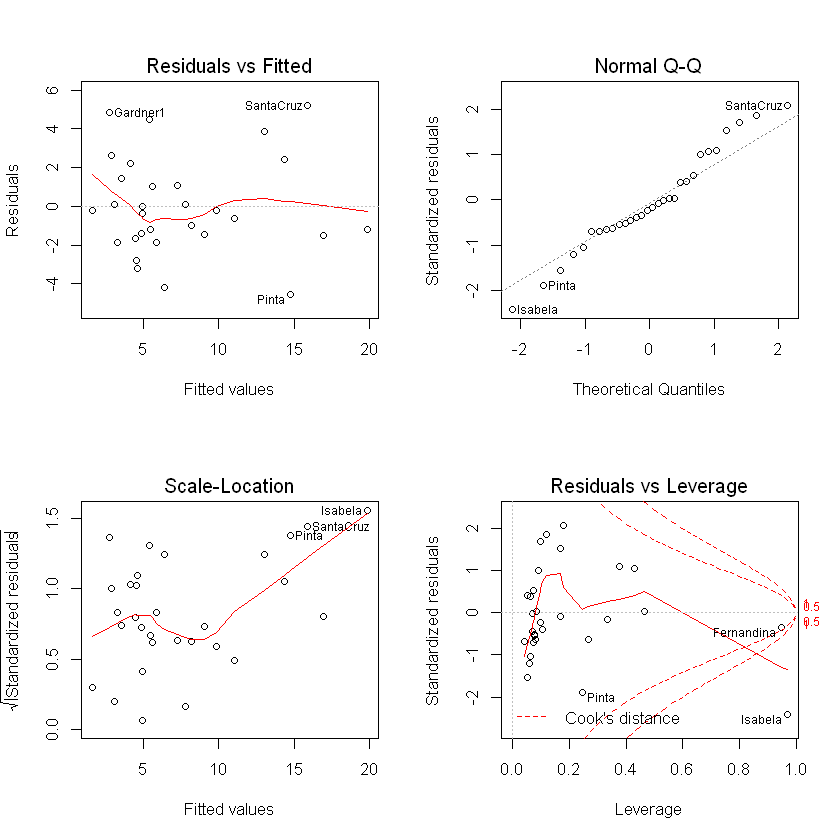

In [14]:
lmod2 = lm(sqrt(Species) ~ ., data = gala)
summary(lmod2)
par(mfrow = c(2,2)); plot(lmod2)

#### (c) One issue with a transformation is that it makes interpretation less natural. Let's try a Poisson regression (with no transformation on the repsonse).


Call:
glm(formula = Species ~ ., family = poisson, data = gala)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.2752  -4.4966  -0.9443   1.9168  10.1849  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.155e+00  5.175e-02  60.963  < 2e-16 ***
Area        -5.799e-04  2.627e-05 -22.074  < 2e-16 ***
Elevation    3.541e-03  8.741e-05  40.507  < 2e-16 ***
Nearest      8.826e-03  1.821e-03   4.846 1.26e-06 ***
Scruz       -5.709e-03  6.256e-04  -9.126  < 2e-16 ***
Adjacent    -6.630e-04  2.933e-05 -22.608  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3510.73  on 29  degrees of freedom
Residual deviance:  716.85  on 24  degrees of freedom
AIC: 889.68

Number of Fisher Scoring iterations: 5


Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

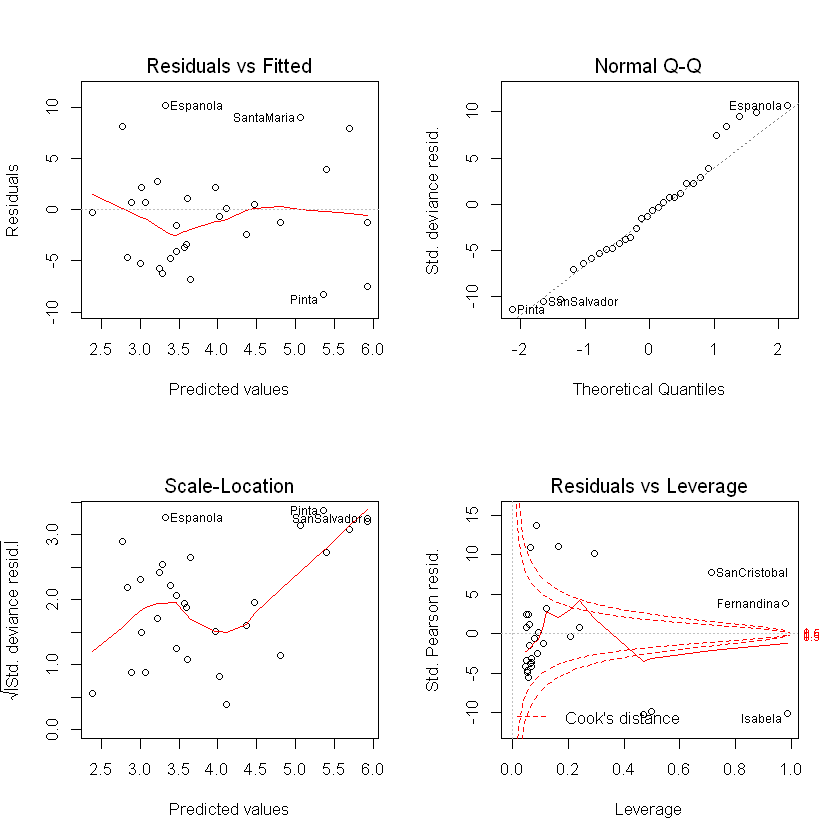

In [15]:
glmod = glm(Species ~ ., data = gala, family = poisson)
summary(glmod)
par(mfrow = c(2,2)); plot(glmod)

#### (d) Interpret the parameter associated with Nearest. 

#### (e) Calculate the deviance for Poisson regression. Does this value show up in the summary? Also, check the goodness of fit of this model using Pearson's $\chi^2$ statistic. What do you conclude about the fit?

In [17]:
with(gala, 2*sum(Species*log(Species/fitted(glmod)) - (Species - fitted(glmod))))
with(gala, sum((Species - fitted(glmod))^2/fitted(glmod)))

glmodReduced = glm(Species ~ . - Nearest, data = gala, family = poisson)

[1] 716.8458

[1] 761.9792

In [18]:
anova(glmodReduced, glmod, test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
25,739.4108,NA,NA,NA
24,716.8458,1,22.56504,2.031481e-06


In [21]:
dispEst = sum(residuals(glmod, type = "pearson")^2/glmod$df.res) #estimate of dispersion parameter
dispEst
summary(glmod, dispersion = dispEst)
pchisq(glmod$deviance, glmod$df.residual, lower.tail = F)

[1] 31.74914


Call:
glm(formula = Species ~ ., family = poisson, data = gala)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.2752  -4.4966  -0.9443   1.9168  10.1849  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.1548079  0.2915897  10.819  < 2e-16 ***
Area        -0.0005799  0.0001480  -3.918 8.95e-05 ***
Elevation    0.0035406  0.0004925   7.189 6.53e-13 ***
Nearest      0.0088256  0.0102621   0.860    0.390    
Scruz       -0.0057094  0.0035251  -1.620    0.105    
Adjacent    -0.0006630  0.0001653  -4.012 6.01e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 31.74914)

    Null deviance: 3510.73  on 29  degrees of freedom
Residual deviance:  716.85  on 24  degrees of freedom
AIC: 889.68

Number of Fisher Scoring iterations: 5


[1] 7.073157e-136

In [22]:
drop1(glmod, test = "F")

Warning message in drop1.glm(glmod, test = "F"):
"F test assumes 'quasipoisson' family"

,Df,Deviance,AIC,F value,Pr(>F)
<none>,NA,716.8458,889.6767,NA,NA
Area,1,1204.3529,1375.1838,16.3217396,4.762092e-04
Elevation,1,2389.5689,2560.3998,56.0027776,1.007228e-07
Nearest,1,739.4108,910.2418,0.7554776,3.933572e-01
Scruz,1,813.6200,984.4509,3.2400008,8.444482e-02
Adjacent,1,1341.4542,1512.2851,20.9118923,1.230182e-04


## Problem #4

Research another type of GLM (beyond binomial and Poisson), find a dataset that is reasonably modeled by that GLM, and model it. Does the model fit well?

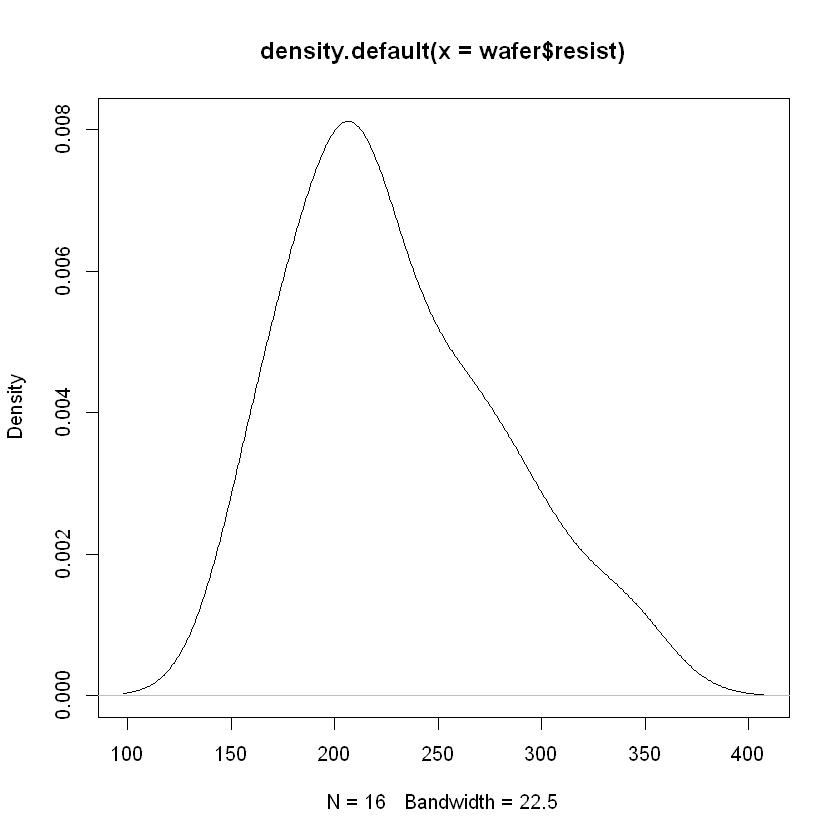

In [1]:
library(faraway)
data(wafer)
plot(density(wafer$resist))

If the outcome is skewed and always positive, it can be modeled using the gamma distribution. So let's try that.

In [10]:
gammaGLM <- glm(formula = resist ~ x1 + x2 + x3 + x4,
                         family  = Gamma(link = "log"),
                         data    = wafer)
summary(gammaGLM)

# dp = sum(resid(gammaGLM, type = "pearson")^2) / gammaGLM$df.res;
# dp


Call:
glm(formula = resist ~ x1 + x2 + x3 + x4, family = Gamma(link = "log"), 
    data = wafer)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.17548  -0.06486   0.01423   0.08399   0.10898  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.44552    0.05856  92.983  < 2e-16 ***
x1+          0.12115    0.05238   2.313 0.041090 *  
x2+         -0.30049    0.05238  -5.736 0.000131 ***
x3+          0.17979    0.05238   3.432 0.005601 ** 
x4+         -0.05757    0.05238  -1.099 0.295248    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.01097542)

    Null deviance: 0.69784  on 15  degrees of freedom
Residual deviance: 0.12418  on 11  degrees of freedom
AIC: 152.91

Number of Fisher Scoring iterations: 4


In [7]:
exp(coef(summary(gammaGLM)))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),231.7185740,1.060314,2.410161e+40,1.000000
x1+,1.1287977,1.053778,1.010352e+01,1.041945
x2+,0.7404588,1.053778,3.226230e-03,1.000131
x3+,1.1969634,1.053778,3.094641e+01,1.005616
x4+,0.9440590,1.053778,3.332107e-01,1.343459


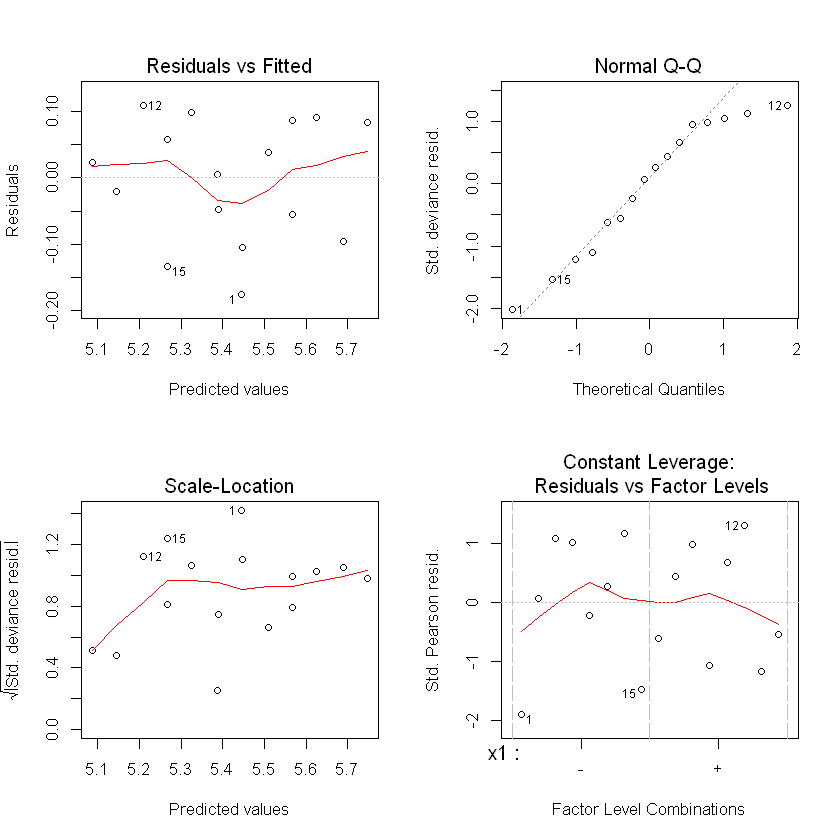

In [11]:
par(mfrow = c(2,2));
plot(gammaGLM)

The residual plot doesn't look to terrible and the QQ plot has some deviation in the tales, but nothing too bad. 

From the summary, let's start with the deviance. The Null deviance is 0.698 and the Residual Deviance is 0.124. Although the deviances were small in both cases, the deviance does go down by a large proportion after the model was fit. We can also see that three of the four predictors were deemed statistically significant, which means they likely had an effect on improving the fit of the model. Therefor, we can say that the glm does fit the model.